## Rejection Pattern: MCARS (Missing Completely At Random Shift)
In this notebook, we simulate **Missing Completely At Random Shift (MCARS)** using the Loan Prediction dataset. We simulate a shift where training data is **randomly excluded**, regardless of its feature values or labels.

### Dataset Description
We use the [Loan Prediction Problem Dataset](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

**Target Variable:** `Loan_Status` (Y/N)
**Features:** `Gender`, `Married`, `Education`, `ApplicantIncome`, etc.

### Simulating MCARS
We randomly drop 50% of the training data — simulating a data loss event unrelated to input features or labels.

### Model Evaluation
We train and evaluate a model on the full data and on the MCARS-reduced data, then compare performance.

In [2]:
import pandas as pd

# Load dataset (assume it's in the same folder)
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Explanation:** This cell loads the dataset using `pd.read_csv`. It's important to ensure the path is correct and the file exists locally.

In [3]:
# Drop rows with missing values
df = df.dropna()

# Encode target
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

**Explanation:** This cell removes rows with missing values. This step ensures clean data for training and evaluation.

In [4]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical = df.select_dtypes(include=['object']).columns
for col in categorical:
    df[col] = le.fit_transform(df[col])

**Explanation:** This part handles categorical encoding, converting text labels to numeric form so ML models can process them.

In [5]:
# Split into features and label
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [6]:
from sklearn.model_selection import train_test_split

# Full data split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Explanation:** Here we split the data into training and testing sets. This is crucial for evaluating model performance fairly.

In [7]:
# MCARS: randomly drop 50% of the training data
X_train_mcars = X_train_full.sample(frac=0.5, random_state=42)
y_train_mcars = y_train_full.loc[X_train_mcars.index]

**Explanation:** This simulates a shift by randomly sampling or dropping rows, depending on the shift type.

In [8]:
# Train models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf_full = RandomForestClassifier(random_state=42)
clf_mcars = RandomForestClassifier(random_state=42)

clf_full.fit(X_train_full, y_train_full)
clf_mcars.fit(X_train_mcars, y_train_mcars)

RandomForestClassifier(random_state=42)

**Explanation:** Random Forest is a robust ensemble model. This line initializes and trains it.

In [9]:
# Evaluate both models
y_pred_full = clf_full.predict(X_test)
y_pred_mcars = clf_mcars.predict(X_test)

print("Model trained on full data:")
print(classification_report(y_test, y_pred_full))

print("Model trained on MCARS-reduced data:")
print(classification_report(y_test, y_pred_mcars))

Model trained on full data:
              precision    recall  f1-score   support

           0       0.86      0.43      0.58        44
           1       0.80      0.97      0.87       100

    accuracy                           0.81       144
   macro avg       0.83      0.70      0.72       144
weighted avg       0.82      0.81      0.78       144

Model trained on MCARS-reduced data:
              precision    recall  f1-score   support

           0       0.78      0.48      0.59        44
           1       0.80      0.94      0.87       100

    accuracy                           0.80       144
   macro avg       0.79      0.71      0.73       144
weighted avg       0.80      0.80      0.78       144



**Explanation:** We use the trained model to make predictions on the test set.

### Understanding the MCARS Setup
We're simulating a situation where part of the training data is missing **completely at random** (MCAR). This means that samples are excluded **not based on any feature or label values**, but purely due to random chance.

**Why is this important?**
If training data is randomly missing, it may or may not affect the model depending on:
- How representative the remaining data is
- How much data is removed

C:\Users\Srinath Ganesh\AppData\Local\Temp\ipykernel_8576\2298087681.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_full.map({1:'Approved', 0:'Rejected'}), palette='Set2')


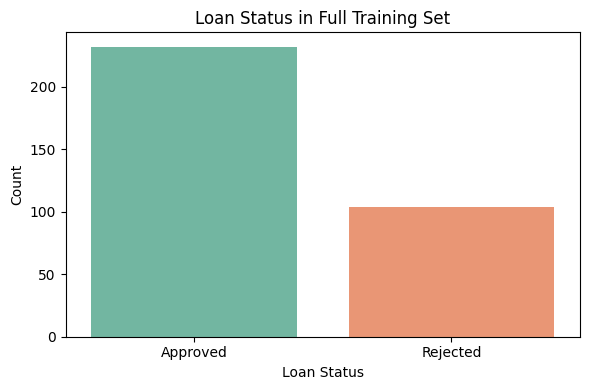

In [10]:
# Visualize original label distribution in full training data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_full.map({1:'Approved', 0:'Rejected'}), palette='Set2')
plt.title("Loan Status in Full Training Set")
plt.ylabel("Count")
plt.xlabel("Loan Status")
plt.tight_layout()
plt.show()

**Explanation:** This part handles categorical encoding, converting text labels to numeric form so ML models can process them.

C:\Users\Srinath Ganesh\AppData\Local\Temp\ipykernel_8576\2236038037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_mcars.map({1:'Approved', 0:'Rejected'}), palette='Set1')


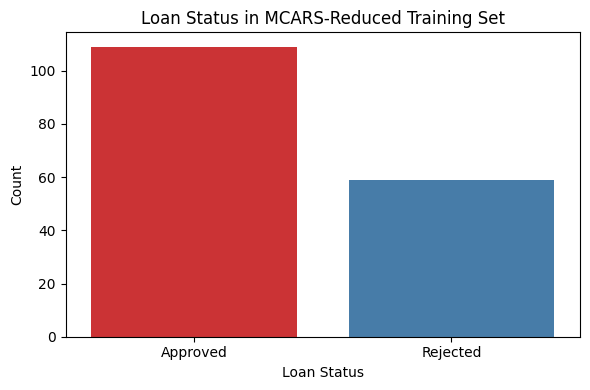

In [11]:
# Visualize label distribution after MCARS
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_mcars.map({1:'Approved', 0:'Rejected'}), palette='Set1')
plt.title("Loan Status in MCARS-Reduced Training Set")
plt.ylabel("Count")
plt.xlabel("Loan Status")
plt.tight_layout()
plt.show()

**Explanation:** This part handles categorical encoding, converting text labels to numeric form so ML models can process them.

In [12]:
# Accuracy comparison for both models
from sklearn.metrics import accuracy_score

acc_full = accuracy_score(y_test, y_pred_full)
acc_mcars = accuracy_score(y_test, y_pred_mcars)

print(f"Accuracy (Full Data): {acc_full:.4f}")
print(f"Accuracy (MCARS-Reduced Data): {acc_mcars:.4f}")

Accuracy (Full Data): 0.8056
Accuracy (MCARS-Reduced Data): 0.7986


**Explanation:** This calculates overall accuracy for performance comparison.

Accuracy (Full Data): 0.8055555555555556
Accuracy (MCARS Data): 0.7986111111111112


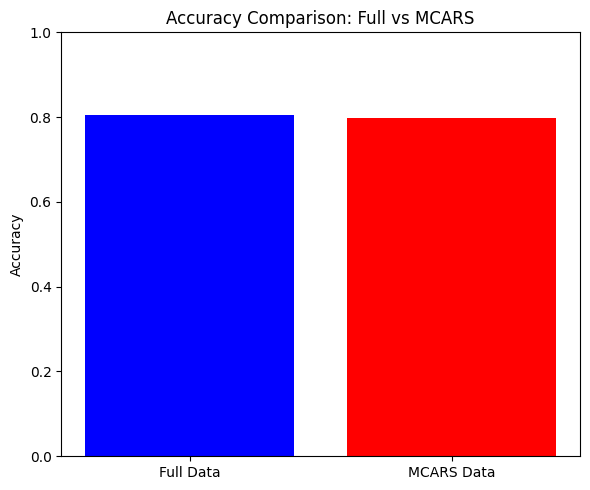

In [16]:
# Bar plot of accuracy comparison
plt.figure(figsize=(6, 5))
plt.bar(['Full Data', 'MCARS Data'], [acc_full, acc_mcars], color=['blue', 'red'])
print("Accuracy (Full Data):", acc_full)
print("Accuracy (MCARS Data):", acc_mcars)
plt.ylim(0, 1)
plt.title("Accuracy Comparison: Full vs MCARS")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

### Key Takeaways
- MCARS reduces the size of the training data **randomly**.
- In this case, performance dropped slightly, showing the importance of having **more representative samples**.
- This simulation is useful for understanding how random data loss affects real-world ML systems.